# Credit Amount Prediction - Hackathon

The data given is of credit records of individuals with certain attributes. The objective of the problem is to predict the values of credit_amount variable as per serial number variable.

### Following 2 models have been tried:
<ul>
<li> Random Forest Regressor </li>
<li> Neural Network </li>
</ul>


### Some details on models considered:
<ul>
<li>On doing EDA, no linear pattern was found between the dependent and the independent variables. Hence Linear Regression has not been attempted as a conclusion of the EDA.</li>
<li>SVR and Polynomial regression could have been tried, but its a known fact that these models consume resources and don't do very well when number of features are more.</li>
<li>PCA will not help much since the heatmap does not show much correlation between the features. In fact using PCA did not fare well when tried.</li>
<ul>

#### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Read training data

In [3]:
df_train = pd.read_csv("train.csv")
df_train.head(100)

,serial number,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,BRONZE,6,YES,NO,A40,1169,A65,NaN,A75,852,34.08,M,Umarried,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,2,SILVER,48,YES,YES,A40,5951,A61,72.0,A73,2400,48.00,F,Divorced,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,3,NaN,12,YES,NO,A46,2096,A61,68.0,A74,2078,41.56,M,Umarried,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,4,BRONZE,42,YES,YES,A40,7882,A61,73.0,A74,2380,47.60,M,Umarried,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,5,BRONZE,24,YES,NO,A40,4870,A61,52.0,A73,1756,52.68,M,Umarried,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
5,6,NaN,36,YES,YES,A46,9055,A65,NaN,A73,2363,47.26,M,Umarried,A101,4,A124,35,A143,A153,1,A172,2,A192,A201
6,7,NaN,24,YES,YES,A40,2835,A63,990.0,A75,1567,47.01,M,Umarried,A101,4,A122,53,A143,A152,1,A173,1,A191,A201
7,8,SILVER,36,YES,YES,A40,6948,A61,98.0,A73,2305,46.10,M,Umarried,A101,2,A123,35,A143,A151,1,A174,1,A192,A201
8,9,NaN,12,YES,YES,A40,3059,A64,2641.0,A74,1891,37.82,M,Divorced,A101,4,A121,61,A143,A152,1,A172,1,A191,A201
9,10,SILVER,30,YES,NO,A40,5234,A61,14.0,A71,964,38.56,M,Married,A101,2,A123,28,A143,A152,2,A174,1,A191,A201


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 25 columns):
serial number       700 non-null int64
account_info        427 non-null object
duration_month      700 non-null int64
Loan                700 non-null object
Regularity          700 non-null object
Purpose             700 non-null object
credit_amount       700 non-null int64
savings_account     700 non-null object
Saving Account      580 non-null float64
employment_st       700 non-null object
Salary              700 non-null int64
investment          700 non-null float64
Gender              700 non-null object
Status              700 non-null object
gurantors           700 non-null object
resident_since      700 non-null int64
property_type       700 non-null object
age                 700 non-null int64
installment_type    700 non-null object
housing_type        700 non-null object
credits_no          700 non-null int64
job_type            700 non-null object
liables             

#### Data cleaning, Pre-processing and Exploratory Data Analysis

In [5]:
# account_info and Saving Account have null values
#setting non-available values as NA and 0 respectively

df_train.loc[df_train['account_info'].isnull(), 'account_info'] = 'NA'
df_train.loc[df_train['Saving Account'].isnull(), 'Saving Account'] = 0
df_train.head()

,serial number,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,BRONZE,6,YES,NO,A40,1169,A65,0.0,A75,852,34.08,M,Umarried,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,2,SILVER,48,YES,YES,A40,5951,A61,72.0,A73,2400,48.00,F,Divorced,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,3,NA,12,YES,NO,A46,2096,A61,68.0,A74,2078,41.56,M,Umarried,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,4,BRONZE,42,YES,YES,A40,7882,A61,73.0,A74,2380,47.60,M,Umarried,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,5,BRONZE,24,YES,NO,A40,4870,A61,52.0,A73,1756,52.68,M,Umarried,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [6]:
def map_to_good_values(df):
    df[['Purpose']] = df[['Purpose']].apply(lambda x : x.map({'A40': 'CAR', 'A46': 'EDUCATION','A47': 'VACATION',
                                                                          'A48': 'RESKILLING', 'A49': 'BUSINESS_EST',
                                                                          'A410': 'OTHERS'}))
    df[['savings_account']] = df[['savings_account']].apply(lambda x : x.map({'A61': 'LT_100', 'A62': '100_500',
                                                                                          'A63': '500_1000','A64': 'GT_1000',
                                                                                          'A65': 'NA'}))
    df[['employment_st']] = df[['employment_st']].apply(lambda x : x.map({'A71': 'UNEMPLOYED', 'A72': 'EPM_LT_YEAR',
                                                                                      'A73': 'EMP_1_4','A74': 'EMP_4_7',
                                                                                      'A75': 'EMP_GT_7'}))
    df[['gurantors']] = df[['gurantors']].apply(lambda x : x.map({'A101': 'SINGLE', 'A102': 'CO_APPLICANT',
                                                                                      'A103': 'GUARANTOR_PRESENT'}))
    df[['property_type']] = df[['property_type']].apply(lambda x : x.map({'A121': 'REAL_ESTATE', 'A122': 'BLDG_LI',
                                                                                      'A123': 'CARS_OTHERS','A124': 'NA'}))
    df[['installment_type']] = df[['installment_type']].apply(lambda x : x.map({'A141': 'BANK', 'A142': 'OULETS_STORES',
                                                                                            'A143': 'NA'}))
    df[['housing_type']] = df[['housing_type']].apply(lambda x : x.map({'A151': 'RENT', 'A152': 'OWNED',
                                                                                    'A153': 'NO_HOUS_EXP'}))
    df[['job_type']] = df[['job_type']].apply(lambda x : x.map({'A171': 'UNEMPLOYED_NONRESIDENT', 'A172': 'UNSKILLED_RESIDENT',
                                                                                'A173': 'SKILLED_EMP', 'A174': 'SELF_EMP_HIGH_SKILLED'}))
    df[['telephone']] = df[['telephone']].apply(lambda x : x.map({'A191': 'NO', 'A192': 'YES'}))
    df[['foreigner']] = df[['foreigner']].apply(lambda x : x.map({'A201': 'YES', 'A202': 'NO'}))
    return df

In [7]:
df_train = map_to_good_values(df_train)

In [8]:
df_train.nunique()

serial number       700
account_info          4
duration_month       32
Loan                  2
Regularity            2
Purpose               5
credit_amount       662
savings_account       5
Saving Account      247
employment_st         5
Salary              577
investment          518
Gender                2
Status                3
gurantors             3
resident_since        4
property_type         4
age                  52
installment_type      3
housing_type          3
credits_no            4
job_type              4
liables               2
telephone             2
foreigner             2
dtype: int64

In [9]:
#A gradual increase is seen in all the columns. No ouliers as such
df_train.describe(percentiles=[0.25,0.30, 0.50,0.75,0.90,0.95,0.96,0.97,0.98,0.99])

,serial number,duration_month,credit_amount,Saving Account,Salary,investment,resident_since,age,credits_no,liables
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,20.652857,3182.331429,219.744286,1610.258571,39.365286,2.808571,35.322857,1.392857,1.148571
std,202.21688,12.279683,2725.319217,527.785992,784.923838,6.784642,1.114573,11.319842,0.572328,0.355920
min,1.00000,4.000000,276.000000,0.000000,700.000000,26.010000,1.000000,19.000000,1.000000,1.000000
25%,175.75000,12.000000,1350.750000,13.000000,953.500000,33.742500,2.000000,27.000000,1.000000,1.000000
30%,210.70000,12.000000,1457.200000,21.000000,1019.000000,34.969000,2.000000,27.000000,1.000000,1.000000
50%,350.50000,18.000000,2253.000000,55.000000,1265.500000,39.570000,3.000000,33.000000,1.000000,1.000000
75%,525.25000,24.000000,3913.250000,95.000000,2198.250000,44.765000,4.000000,41.000000,2.000000,1.000000
90%,630.10000,36.000000,7004.800000,580.900000,2855.300000,47.922000,4.000000,52.000000,2.000000,2.000000
95%,665.05000,48.000000,8980.800000,990.300000,3173.150000,50.018500,4.000000,58.100000,2.000000,2.000000


##### 96% of the credit_amount values was lesser than 10000 and hence dropped rows which had credit_amount values more than 10000. This removes about 26 rows which is about 0.03% of the data which is fine.

In [10]:
df_train = df_train[df_train['credit_amount'] < 10000]
df_train.shape

(674, 25)

In [11]:
def map_age_grp(age):
    age_group = ''
    if age <= 30:
        age_group = 'Below30' 
    elif age > 30 and age <= 60:
        age_group = 'Between_30_60'
    elif age > 60:
        age_group = 'Above_60'
    return age_group;   

df_train['age_group'] = df_train['age'].apply(map_age_grp)
df_train = df_train.drop(columns=['age'], axis=1)

In [12]:
categorical_columns = df_train.select_dtypes(['object']).columns.tolist()
numerical_columns = df_train.select_dtypes(['float64','int64']).columns.tolist()

In [13]:
categorical_columns

['account_info',
 'Loan',
 'Regularity',
 'Purpose',
 'savings_account',
 'employment_st',
 'Gender',
 'Status',
 'gurantors',
 'property_type',
 'installment_type',
 'housing_type',
 'job_type',
 'telephone',
 'foreigner',
 'age_group']

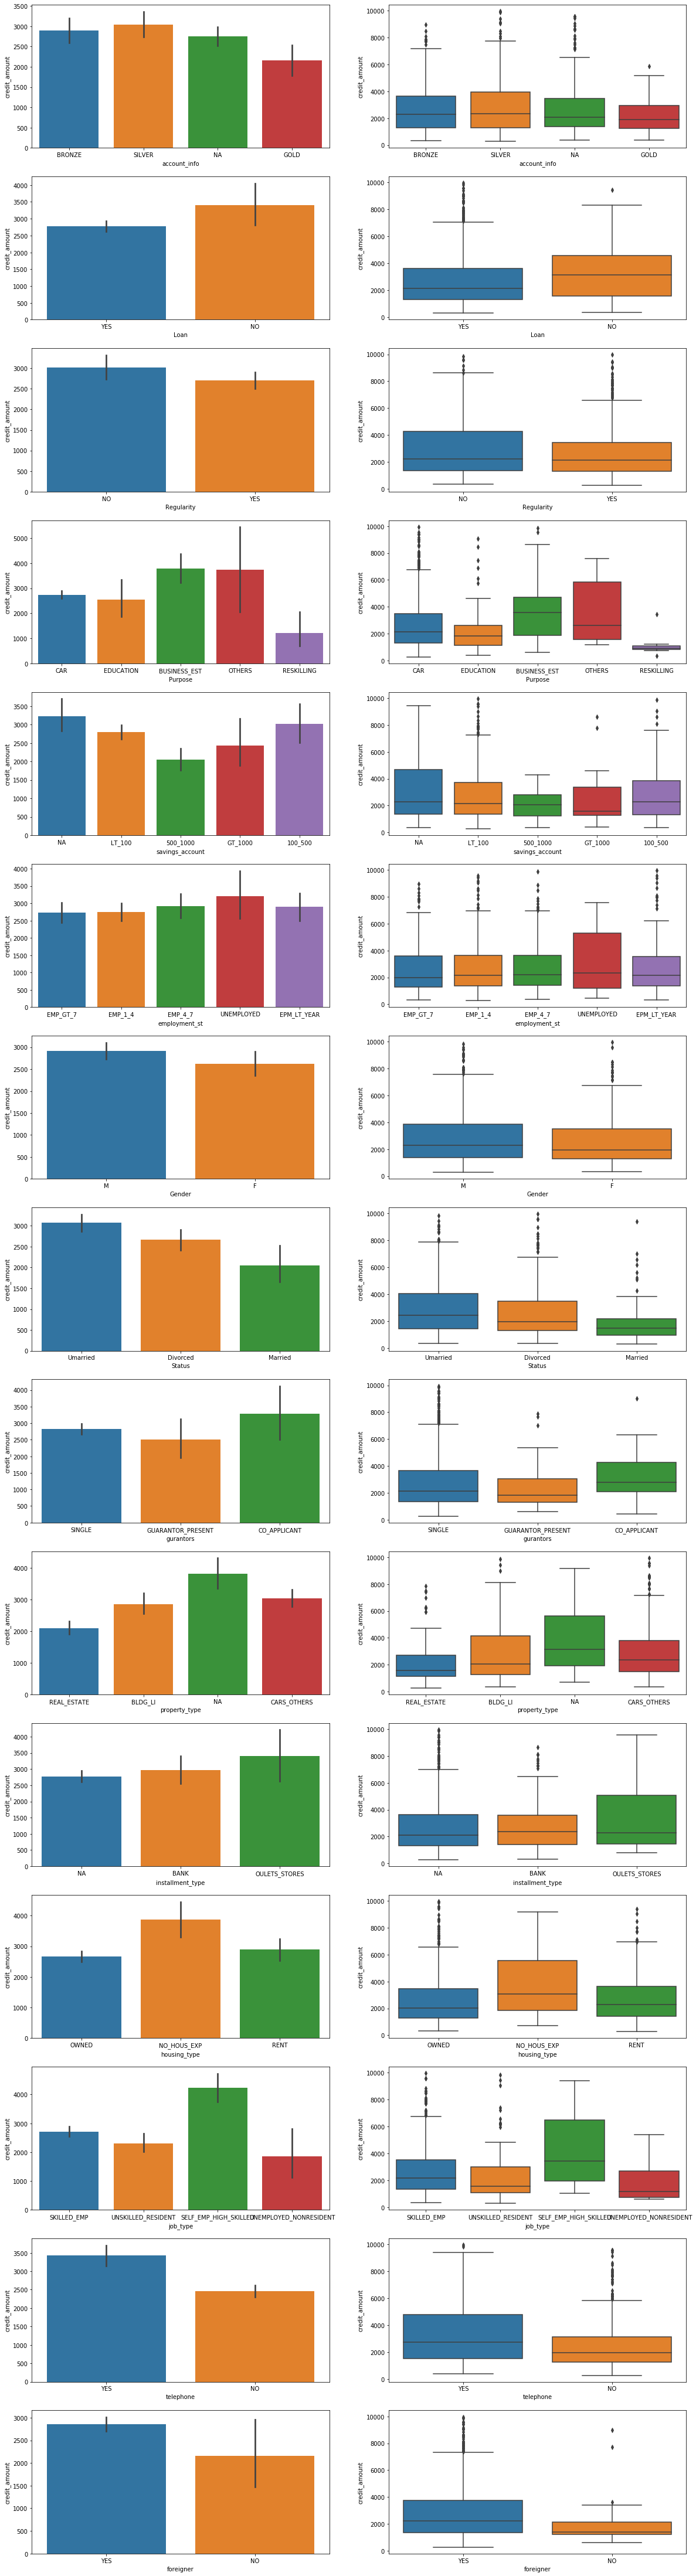

In [14]:
plt.figure(figsize=(20, 80))

for i in np.arange(0,15):
    plt.subplot(15, 2, (i+i+1))
    sns.barplot(x=df_train[categorical_columns[i]], y=df_train['credit_amount'], data=df_train)
    plt.subplot(15, 2, (i+i+2))
    sns.boxplot(x=df_train[categorical_columns[i]], y=df_train['credit_amount'], data=df_train)

account_info, employment_st, Gender - Not much difference in the average, 50th percentile shows no difference, but there is variation in credit_amounts of individual types

Loan - People who have loan have lower credit_amounts, which is obvious since they already have a loan and hence eligible for lesser future credit amounts. Difference is seen in the 50th percentile also. More variation from mean credit_amount is seen in people who have no loans.

Regularity - 50th percentile shows no difference, but there is variation in credit_amounts of individual Regularity

Purpose - Variation seen in credit_amounts based on Purpose of loans taken. It is observed from given sample that people have taken less loans for re-skilling purposes.

savings_account - Variation seen in credit_amounts based on money in savings account. Surprisingly, 50th percentile of people with greater than 1000 units have lesser credit_amounts. May be they have loans?

Status - Variation seen in credit_amounts based on Marital status. Unmarried seem to have higher credit_amounts.

Guarantors - Variation seen in credit_amounts based on Guarantors status. Loans with co-applicants seem to have higher credit_amounts.

property_type - Variation seen in credit_amounts based on property_type. Surprisingly, People having real_estate have lesser credit_amounts. Again, may be they have loans?

installment_type - Variation seen in credit_amounts based on installment_type. 50th percentile does not show much difference. Surprisingly, People having real_estate have lesser credit_amounts. Again, may be they have loans?

job_type - Variation seen in credit_amounts based on job_type. High skilled people have higher credit amounts.

telephone - Variation seen in credit_amounts based on telephone. People who have telephone records have higher credit amounts.

foriegner - Variation seen in credit_amounts based on foriegner. People who are a foriegner have higher credit amounts.

##### BiVariate Segmented Analysis

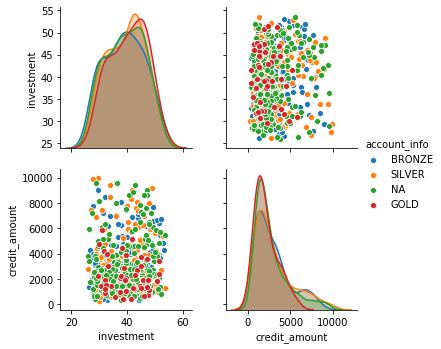

In [15]:
sns.pairplot(df_train[['investment', 'credit_amount','account_info']], hue='account_info')

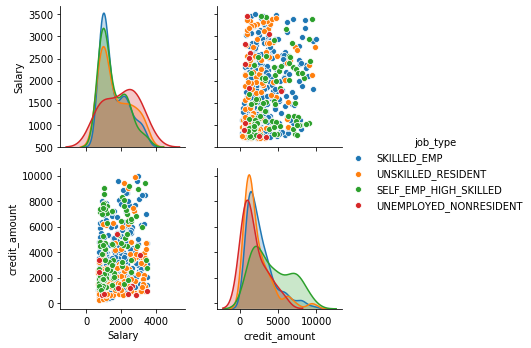

In [16]:
sns.pairplot(df_train[['Salary', 'credit_amount','job_type']], hue='job_type')

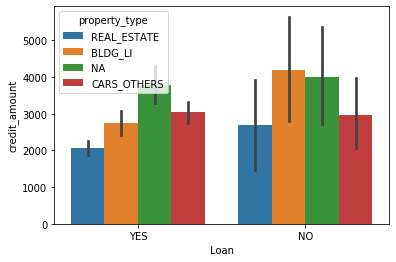

In [17]:
sns.barplot(x=df_train['Loan'], y=df_train['credit_amount'], hue=df_train['property_type'])

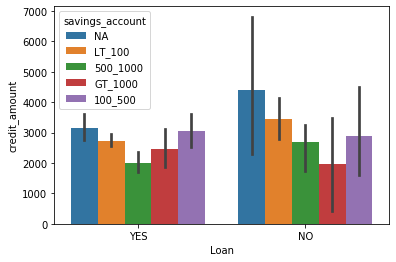

In [18]:
sns.barplot(x=df_train['Loan'], y=df_train['credit_amount'], hue=df_train['savings_account'])

In [19]:
numerical_columns

['serial number',
 'duration_month',
 'credit_amount',
 'Saving Account',
 'Salary',
 'investment',
 'resident_since',
 'credits_no',
 'liables']

##### Relation among the continuous variables
The plots do not show a linear relation between credit_amount and the continuous features.

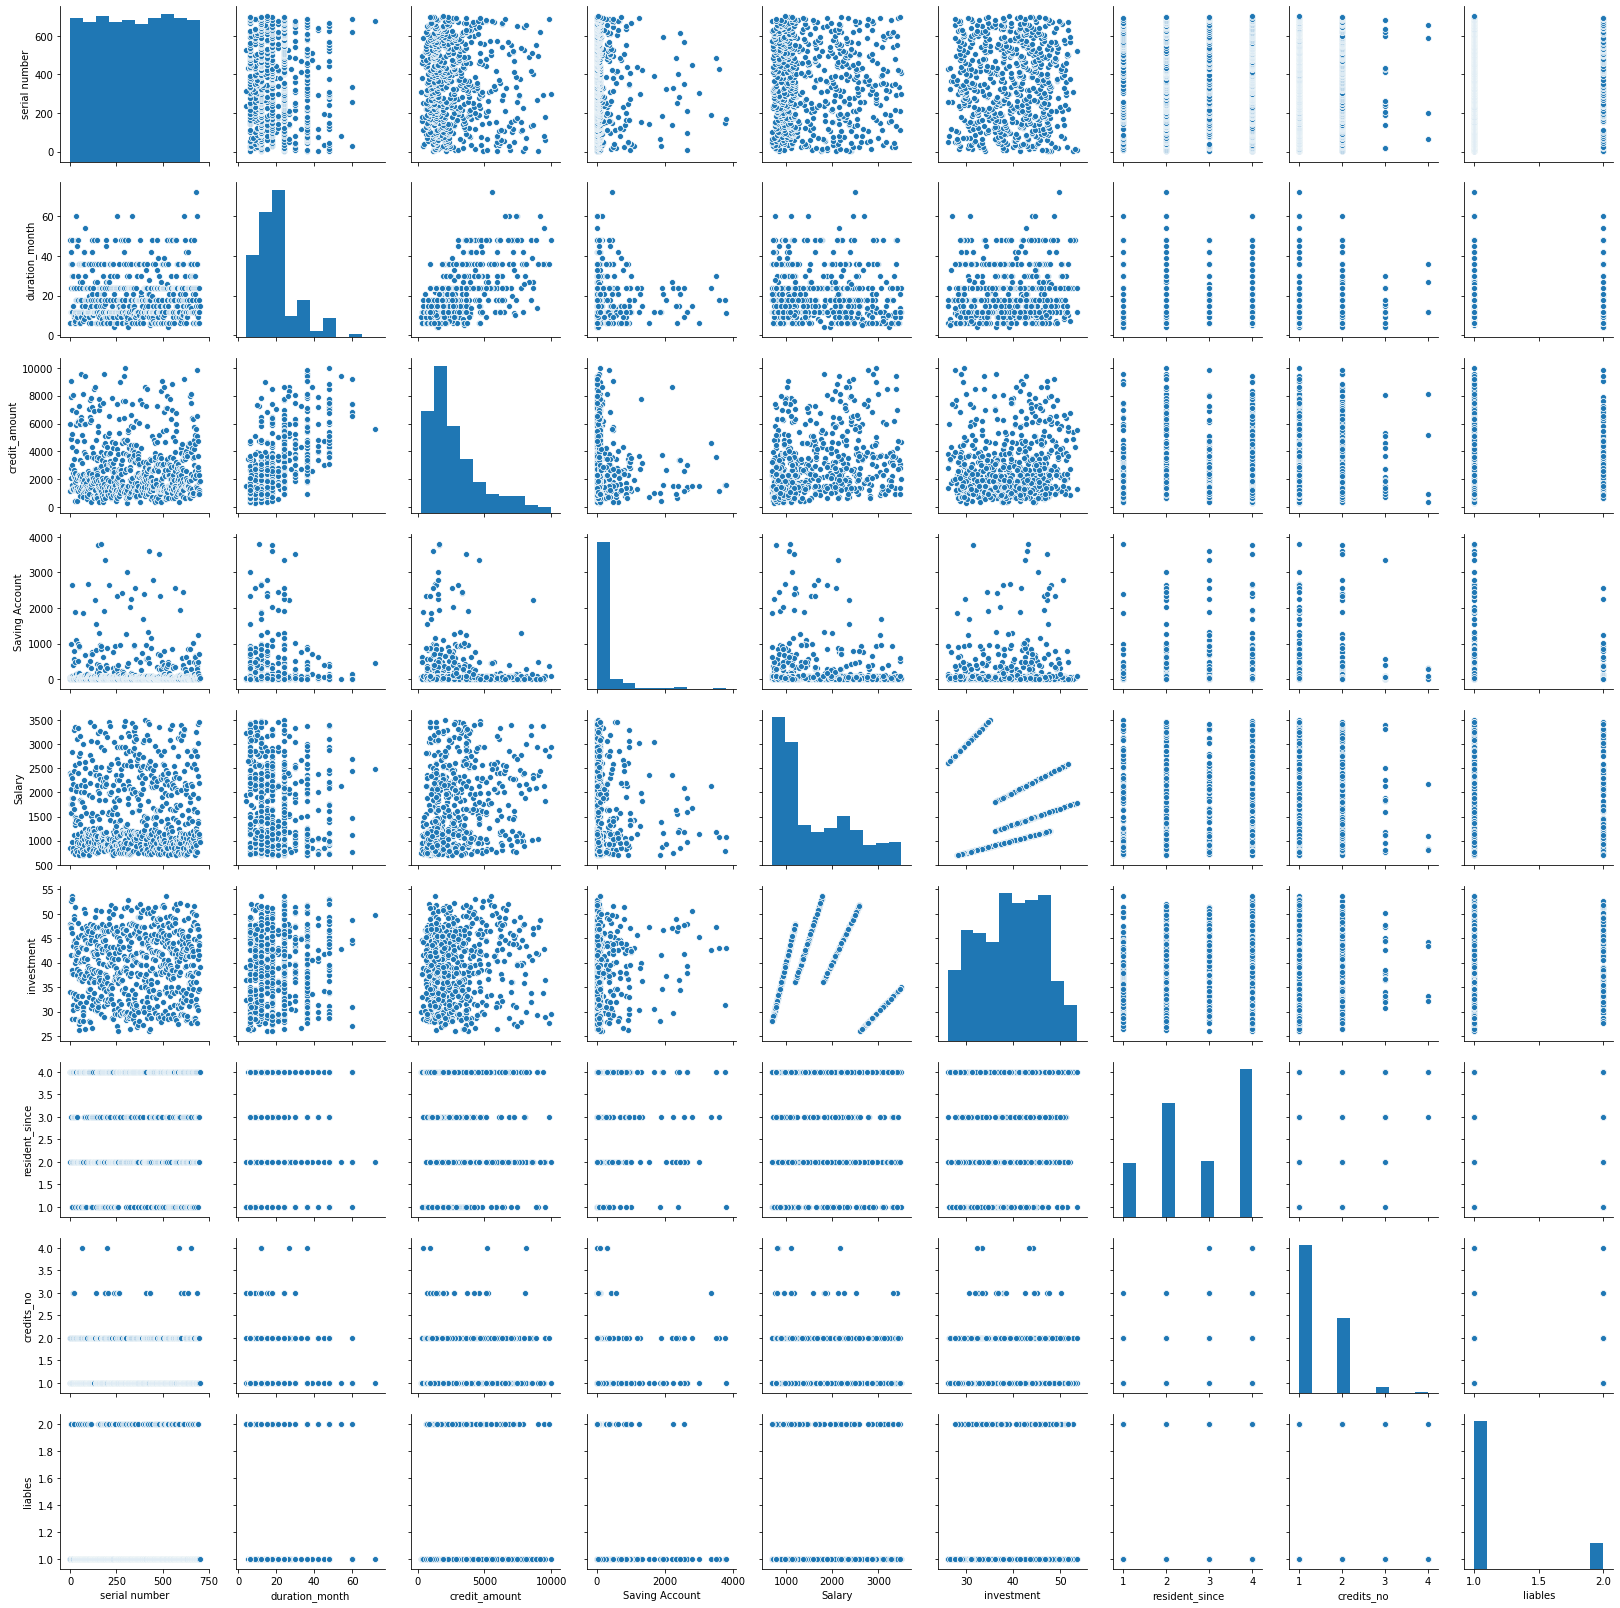

In [20]:
sns.pairplot(df_train[numerical_columns])

##### The correlation coefficients are very low which signifies that the data is not correlated

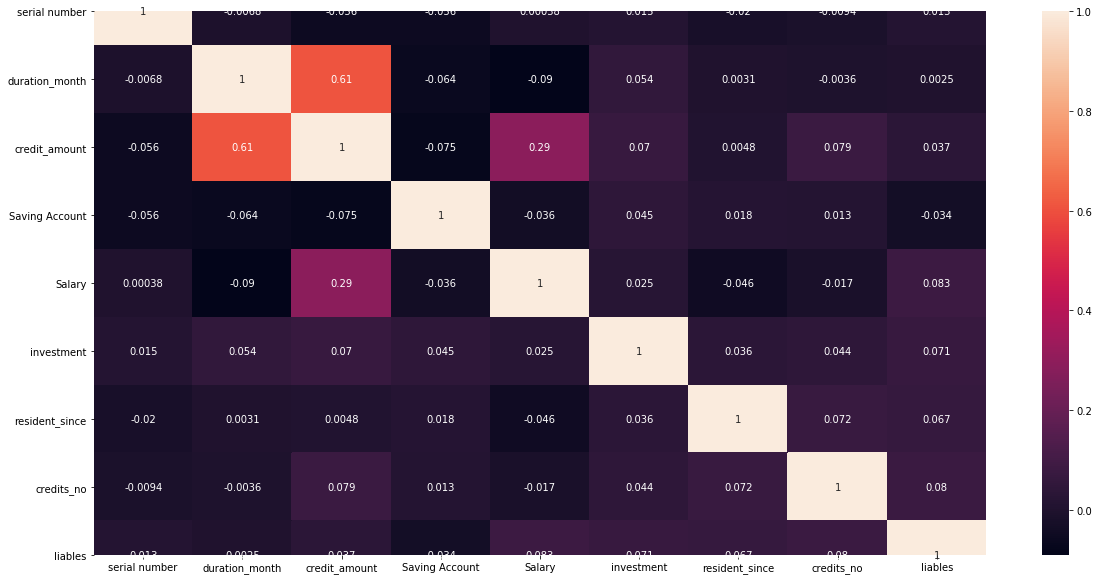

In [21]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_train.corr(),annot = True)
plt.show()

In [22]:
categorical_columns

['account_info',
 'Loan',
 'Regularity',
 'Purpose',
 'savings_account',
 'employment_st',
 'Gender',
 'Status',
 'gurantors',
 'property_type',
 'installment_type',
 'housing_type',
 'job_type',
 'telephone',
 'foreigner',
 'age_group']

##### Encode categorical columns

In [23]:
def preprocess_cat_columns(df):
    df[['Loan','Regularity']] = df[['Loan','Regularity']].apply(lambda x : x.map({'YES': 1, 'NO': 0}))
    df[['foreigner']] = df[['foreigner']].apply(lambda x : x.map({'YES': 1, 'NO': 0}))
    df[['telephone']] = df[['telephone']].apply(lambda x : x.map({'YES': 1, 'NO': 0}))
    df[['Gender']] = df[['Gender']].apply(lambda x : x.map({'M': 1, 'F': 0}))
    
    dummy_columns = ['account_info','Purpose','savings_account','employment_st','Status','gurantors','property_type',
                 'installment_type','housing_type','job_type','age_group']
    for col in dummy_columns:
        dummy = pd.get_dummies(df[[col]], drop_first=True, prefix=col)
        df = df.drop([col], 1)
        df = pd.concat([df,dummy], axis=1)
    return df

In [24]:
df_train = preprocess_cat_columns(df_train)
df_train.head(100)

,serial number,duration_month,Loan,Regularity,credit_amount,Saving Account,Salary,investment,Gender,resident_since,credits_no,liables,telephone,foreigner,account_info_GOLD,account_info_NA,account_info_SILVER,Purpose_CAR,Purpose_EDUCATION,Purpose_OTHERS,Purpose_RESKILLING,savings_account_500_1000,savings_account_GT_1000,savings_account_LT_100,savings_account_NA,employment_st_EMP_4_7,employment_st_EMP_GT_7,employment_st_EPM_LT_YEAR,employment_st_UNEMPLOYED,Status_Married,Status_Umarried,gurantors_GUARANTOR_PRESENT,gurantors_SINGLE,property_type_CARS_OTHERS,property_type_NA,property_type_REAL_ESTATE,installment_type_NA,installment_type_OULETS_STORES,housing_type_OWNED,housing_type_RENT,job_type_SKILLED_EMP,job_type_UNEMPLOYED_NONRESIDENT,job_type_UNSKILLED_RESIDENT,age_group_Below30,age_group_Between_30_60
0,1,6,1,0,1169,0.0,852,34.08,1,4,2,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0
1,2,48,1,1,5951,72.0,2400,48.00,0,2,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0
2,3,12,1,0,2096,68.0,2078,41.56,1,3,1,2,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1
3,4,42,1,1,7882,73.0,2380,47.60,1,4,1,2,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1
4,5,24,1,0,4870,52.0,1756,52.68,1,4,2,2,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
5,6,36,1,1,9055,0.0,2363,47.26,1,4,1,2,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1
6,7,24,1,1,2835,990.0,1567,47.01,1,4,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1
7,8,36,1,1,6948,98.0,2305,46.10,1,2,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1
8,9,12,1,1,3059,2641.0,1891,37.82,1,4,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0
9,10,30,1,0,5234,14.0,964,38.56,1,2,2,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0


### Model Building

##### Split into Test and Train Data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
df_train.columns

Index(['serial number', 'duration_month', 'Loan', 'Regularity',
       'credit_amount', 'Saving Account', 'Salary', 'investment', 'Gender',
       'resident_since', 'credits_no', 'liables', 'telephone', 'foreigner',
       'account_info_GOLD', 'account_info_NA', 'account_info_SILVER',
       'Purpose_CAR', 'Purpose_EDUCATION', 'Purpose_OTHERS',
       'Purpose_RESKILLING', 'savings_account_500_1000',
       'savings_account_GT_1000', 'savings_account_LT_100',
       'savings_account_NA', 'employment_st_EMP_4_7', 'employment_st_EMP_GT_7',
       'employment_st_EPM_LT_YEAR', 'employment_st_UNEMPLOYED',
       'Status_Married', 'Status_Umarried', 'gurantors_GUARANTOR_PRESENT',
       'gurantors_SINGLE', 'property_type_CARS_OTHERS', 'property_type_NA',
       'property_type_REAL_ESTATE', 'installment_type_NA',
       'installment_type_OULETS_STORES', 'housing_type_OWNED',
       'housing_type_RENT', 'job_type_SKILLED_EMP',
       'job_type_UNEMPLOYED_NONRESIDENT', 'job_type_UNSKILLED_RESID

In [27]:
X = df_train.drop(['serial number','credit_amount'], axis=1)
X.head()

,duration_month,Loan,Regularity,Saving Account,Salary,investment,Gender,resident_since,credits_no,liables,telephone,foreigner,account_info_GOLD,account_info_NA,account_info_SILVER,Purpose_CAR,Purpose_EDUCATION,Purpose_OTHERS,Purpose_RESKILLING,savings_account_500_1000,savings_account_GT_1000,savings_account_LT_100,savings_account_NA,employment_st_EMP_4_7,employment_st_EMP_GT_7,employment_st_EPM_LT_YEAR,employment_st_UNEMPLOYED,Status_Married,Status_Umarried,gurantors_GUARANTOR_PRESENT,gurantors_SINGLE,property_type_CARS_OTHERS,property_type_NA,property_type_REAL_ESTATE,installment_type_NA,installment_type_OULETS_STORES,housing_type_OWNED,housing_type_RENT,job_type_SKILLED_EMP,job_type_UNEMPLOYED_NONRESIDENT,job_type_UNSKILLED_RESIDENT,age_group_Below30,age_group_Between_30_60
0,6,1,0,0.0,852,34.08,1,4,2,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0
1,48,1,1,72.0,2400,48.00,0,2,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0
2,12,1,0,68.0,2078,41.56,1,3,1,2,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1
3,42,1,1,73.0,2380,47.60,1,4,1,2,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1
4,24,1,0,52.0,1756,52.68,1,4,2,2,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1


In [28]:
y = df_train['credit_amount']
y

0      1169
1      5951
2      2096
3      7882
4      4870
5      9055
6      2835
7      6948
8      3059
9      5234
10     1295
11     4308
12     1567
13     1199
14     1403
15     1282
16     2424
17     8072
19     3430
20     2134
21     2647
22     2241
23     1804
24     2069
25     1374
26      426
27      409
28     2415
29     6836
30     1913
31     4020
32     5866
33     1264
34     1474
35     4746
36     6110
37     2100
38     1225
39      458
40     2333
41     1158
42     6204
43     6187
44     6143
45     1393
46     2299
47     1352
48     7228
49     2073
50     2333
51     5965
52     1262
53     3378
54     2225
55      783
56     6468
57     9566
58     1961
59     6229
60     1391
61     1537
62     1953
64     3181
65     5190
66     2171
67     1007
68     1819
69     2394
70     8133
71      730
72     1164
73     5954
74     1977
75     1526
76     3965
77     4771
78     9436
79     3832
80     5943
81     1213
82     1568
83     1755
84     2315
85  

In [29]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

##### Perform scaling

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.6870399 ,  0.30464311,  0.78648376, ..., -0.49269064,
        -0.83687574,  0.91642989],
       [-0.6870399 ,  0.30464311,  0.78648376, ...,  2.02967121,
        -0.83687574,  0.91642989],
       [-0.16043975,  0.30464311, -1.27148207, ...,  2.02967121,
        -0.83687574,  0.91642989],
       ...,
       [-0.16043975,  0.30464311,  0.78648376, ..., -0.49269064,
         1.19492052, -1.09119094],
       [-0.42373983,  0.30464311,  0.78648376, ..., -0.49269064,
        -0.83687574,  0.91642989],
       [ 0.3661604 ,  0.30464311, -1.27148207, ..., -0.49269064,
        -0.83687574,  0.91642989]])

In [32]:
X_train.shape

(471, 43)

In [33]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=25)

In [34]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(471, 25)

In [35]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(203, 25)

#### Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from keras.losses import mean_squared_error
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestRegressor()

Using TensorFlow backend.


##### Perform grid-search for getting right hyper-parameters

In [37]:
params = {'n_estimators':[100, 150, 250, 500],
          'max_features':["auto","sqrt", "log2"],
          'max_depth':[9, 12, 15, 20],
          'min_samples_leaf':[2, 4, 6, 8, 10]
          }
gridmodel = GridSearchCV(estimator = model_rf,
                         param_grid = params,
                         cv = 5,
                         scoring = 'neg_mean_squared_error',
                         n_jobs = -1)

In [38]:
gridmodel.fit(X_train, y_train) 
gridmodel

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [9, 12, 15, 20],
   

In [39]:
gridmodel.best_score_

-1993048.7570698163

In [40]:
gridmodel.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'n_estimators': 150}

In [41]:
pred_train_rf= gridmodel.predict(X_train)
rmse_train_rf = np.sqrt(mean_squared_error(y_train,pred_train_rf))
nrmse_train_rf = (1-rmse_train_rf/(np.max(y_train) - np.min(y_train)))*100
nrmse_train_rf_with_norm_const = (1-rmse_train_rf/100000)*100
print('Train RMSE : {0}'.format(rmse_train_rf))
print('Train NRMSE : {0}'.format(nrmse_train_rf))
print('Train NRMSE with Norm Constant = 100000  : {0}'.format(nrmse_train_rf_with_norm_const))

Train RMSE : 1166.8094482421875
Train NRMSE : 87.95116224450446
Train NRMSE with Norm Constant = 100000  : 98.83319055175781


In [42]:
X_test = scaler.transform(X_test)

In [43]:
pred_test_rf= gridmodel.predict(X_test)
rmse_test_rf = np.sqrt(mean_squared_error(y_test,pred_test_rf))
nrmse_test_rf = (1-rmse_test_rf/(np.max(y_test) - np.min(y_test)))*100
nrmse_test_rf_with_norm_const = (1-nrmse_test_rf/100000)*100
print('Test RMSE : {0}'.format(rmse_test_rf))
print('Test NRMSE : {0}'.format(nrmse_test_rf))
print('Test NRMSE with Norm Constant = 100000  : {0}'.format(nrmse_test_rf_with_norm_const))

Test RMSE : 1572.150390625
Test NRMSE : 83.4840803590188
Test NRMSE with Norm Constant = 100000  : 99.91651591964099


In [44]:
X_test.shape

(203, 43)

#### Neural Network

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras import regularizers
from keras import optimizers
from keras import backend as K

In [46]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(mean_squared_error(y_true, y_pred))

In [47]:
nn_model = Sequential()

nn_model.add(Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), kernel_initializer='uniform', input_dim=43, activation='relu'))
nn_model.add(Dense(32, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), kernel_initializer='uniform', activation = 'relu'))
nn_model.add(Dense(32, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), kernel_initializer='uniform', activation = 'relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(32, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), kernel_initializer='uniform', activation = 'relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(32, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), kernel_initializer='uniform', activation = 'relu'))
nn_model.add(Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), kernel_initializer='uniform', activation = 'relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(1,  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), kernel_initializer='uniform', activation='linear'))

opt = optimizers.RMSprop(learning_rate=0.001, rho=0.9)
nn_model.compile(loss=root_mean_squared_error, optimizer=opt)

In [48]:
nn_model.fit(X_train, y_train, epochs=150, batch_size=128)

Epoch 1/150
471/471 [==============================] - 0s 563us/step - loss: 2747.6551
Epoch 2/150
471/471 [==============================] - 0s 19us/step - loss: 2747.5897
Epoch 3/150
471/471 [==============================] - 0s 19us/step - loss: 2747.5470
Epoch 4/150
471/471 [==============================] - 0s 19us/step - loss: 2747.5122
Epoch 5/150
471/471 [==============================] - 0s 17us/step - loss: 2747.4829
Epoch 6/150
471/471 [==============================] - 0s 19us/step - loss: 2747.4556
Epoch 7/150
471/471 [==============================] - 0s 17us/step - loss: 2747.4310
Epoch 8/150
471/471 [==============================] - 0s 19us/step - loss: 2747.4087
Epoch 9/150
471/471 [==============================] - 0s 19us/step - loss: 2747.3881
Epoch 10/150
471/471 [==============================] - 0s 19us/step - loss: 2747.3674
Epoch 11/150
471/471 [==============================] - 0s 19us/step - loss: 2747.3477
Epoch 12/150
471/471 [=============================

471/471 [==============================] - 0s 21us/step - loss: 991.7244
Epoch 96/150
471/471 [==============================] - 0s 19us/step - loss: 966.2157
Epoch 97/150
471/471 [==============================] - 0s 19us/step - loss: 951.0272
Epoch 98/150
471/471 [==============================] - 0s 21us/step - loss: 951.3447
Epoch 99/150
471/471 [==============================] - 0s 21us/step - loss: 983.6795
Epoch 100/150
471/471 [==============================] - 0s 21us/step - loss: 1020.6521
Epoch 101/150
471/471 [==============================] - 0s 19us/step - loss: 979.2002
Epoch 102/150
471/471 [==============================] - 0s 19us/step - loss: 970.6135
Epoch 103/150
471/471 [==============================] - 0s 19us/step - loss: 966.5498
Epoch 104/150
471/471 [==============================] - 0s 19us/step - loss: 968.7043
Epoch 105/150
471/471 [==============================] - 0s 19us/step - loss: 951.1468
Epoch 106/150
471/471 [==============================] - 0s 

In [49]:
pred_train_nn= nn_model.predict(X_train)
np.sqrt(mean_squared_error(y_train,pred_train_nn))
pred_train_nn = pred_train_nn.reshape(471,)
rmse_train_nn = np.sqrt(mean_squared_error(y_train,pred_train_nn))
nrmse_train_nn = (1-rmse_train_nn/(np.max(y_train) - np.min(y_train)))*100
nrmse_train_nn_with_norm_const = (1-rmse_train_nn/100000)*100
print('Train RMSE : {0}'.format(rmse_train_nn))
print('Train NRMSE : {0}'.format(nrmse_train_nn))
print('Train NRMSE with Norm Constant = 100000  : {0}'.format(nrmse_train_nn_with_norm_const))

Train RMSE : 1200.2755126953125
Train NRMSE : 87.60558124023841
Train NRMSE with Norm Constant = 100000  : 98.79972448730469


In [61]:
pred_test_nn= nn_model.predict(X_test)
pred_test_nn = pred_test_nn.reshape(203,)
rmse_test_nn = np.sqrt(mean_squared_error(y_test,pred_test_nn))
nrmse_test_nn = (1-rmse_test_nn/(np.max(y_test) - np.min(y_test)))*100
nrmse_test_nn_with_norm_const = (1-rmse_test_nn/100000)*100
print('Test RMSE : {0}'.format(rmse_test_nn))
print('Test NRMSE : {0}'.format(nrmse_test_nn))
print('Test NRMSE with Norm Constant = 100000  : {0}'.format(nrmse_test_nn_with_norm_const))

Test RMSE : 1642.503662109375
Test NRMSE : 82.74499777172628
Test NRMSE with Norm Constant = 100000  : 98.35749633789062


In [67]:
nrmse_test_nn = (1-2397/(np.max(y_test) - np.min(y_test)))*100
nrmse_test_nn

74.81878348566026

#### Predict Test Data

In [51]:
df_orig_test = pd.read_csv("test.csv")
df_test = pd.read_csv("test.csv")
df_test.head(100)

,serial number,account_info,duration_month,Loan,Regularity,Purpose,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,NaN,12,YES,YES,A40,A63,517.0,A73,1134,45.36,F,Divorced,A101,4,A123,29,A143,A151,1,A172,1,A191,A201
1,2,BRONZE,48,YES,NO,A40,A61,18.0,A75,783,31.32,M,Umarried,A101,4,A124,46,A143,A153,2,A173,1,A192,A201
2,3,GOLD,24,YES,YES,A40,A62,389.0,A75,1181,47.24,F,Divorced,A101,2,A124,47,A143,A153,1,A173,1,A192,A201
3,4,SILVER,30,YES,NO,A49,A62,326.0,A75,853,34.12,M,Umarried,A101,2,A122,41,A142,A152,2,A173,1,A191,A201
4,5,SILVER,27,YES,YES,A49,A61,16.0,A72,888,35.52,F,Divorced,A101,1,A122,32,A143,A152,1,A173,2,A192,A201
5,6,NaN,15,YES,YES,A40,A63,836.0,A75,2745,27.45,F,Divorced,A101,4,A124,35,A143,A153,1,A173,1,A191,A201
6,7,SILVER,48,YES,YES,A40,A62,394.0,A74,1551,46.53,M,Umarried,A101,2,A122,24,A143,A152,1,A173,1,A191,A201
7,8,SILVER,12,NO,YES,A40,A61,73.0,A72,1128,45.12,F,Divorced,A101,3,A122,25,A143,A151,2,A173,1,A191,A201
8,9,SILVER,9,YES,YES,A40,A61,21.0,A75,876,35.04,F,Divorced,A101,4,A121,25,A143,A152,1,A173,1,A191,A201
9,10,SILVER,9,YES,YES,A40,A61,61.0,A73,2181,43.62,M,Umarried,A101,2,A121,37,A143,A152,1,A172,2,A191,A201


In [52]:
df_test.loc[df_test['account_info'].isnull(), 'account_info'] = 'NA'
df_test.loc[df_test['Saving Account'].isnull(), 'Saving Account'] = 0

In [53]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 24 columns):
serial number       300 non-null int64
account_info        300 non-null object
duration_month      300 non-null int64
Loan                300 non-null object
Regularity          300 non-null object
Purpose             300 non-null object
savings_account     300 non-null object
Saving Account      300 non-null float64
employment_st       300 non-null object
Salary              300 non-null int64
investment          300 non-null float64
Gender              300 non-null object
Status              300 non-null object
gurantors           300 non-null object
resident_since      300 non-null int64
property_type       300 non-null object
age                 300 non-null int64
installment_type    300 non-null object
housing_type        300 non-null object
credits_no          300 non-null int64
job_type            300 non-null object
liables             300 non-null int64
telephone           

In [54]:
df_test['age_group'] = df_test['age'].apply(map_age_grp)
df_test = df_test.drop(columns=['age','serial number'], axis=1)
df_test = map_to_good_values(df_test)
df_test = preprocess_cat_columns(df_test)
df_test.head(100)

,duration_month,Loan,Regularity,Saving Account,Salary,investment,Gender,resident_since,credits_no,liables,telephone,foreigner,account_info_GOLD,account_info_NA,account_info_SILVER,Purpose_CAR,Purpose_EDUCATION,Purpose_OTHERS,Purpose_RESKILLING,savings_account_500_1000,savings_account_GT_1000,savings_account_LT_100,savings_account_NA,employment_st_EMP_4_7,employment_st_EMP_GT_7,employment_st_EPM_LT_YEAR,employment_st_UNEMPLOYED,Status_Married,Status_Umarried,gurantors_GUARANTOR_PRESENT,gurantors_SINGLE,property_type_CARS_OTHERS,property_type_NA,property_type_REAL_ESTATE,installment_type_NA,installment_type_OULETS_STORES,housing_type_OWNED,housing_type_RENT,job_type_SKILLED_EMP,job_type_UNEMPLOYED_NONRESIDENT,job_type_UNSKILLED_RESIDENT,age_group_Below30,age_group_Between_30_60
0,12,1,1,517.0,1134,45.36,0,4,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,1,0
1,48,1,0,18.0,783,31.32,1,4,2,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
2,24,1,1,389.0,1181,47.24,0,2,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,30,1,0,326.0,853,34.12,1,2,2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1
4,27,1,1,16.0,888,35.52,0,1,1,2,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1
5,15,1,1,836.0,2745,27.45,0,4,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
6,48,1,1,394.0,1551,46.53,1,2,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0
7,12,0,1,73.0,1128,45.12,0,3,2,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0
8,9,1,1,21.0,876,35.04,0,4,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0
9,9,1,1,61.0,2181,43.62,1,2,1,2,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1


In [55]:
df_test.shape

(300, 43)

In [56]:
X_test_data = df_test.to_numpy()
X_test_data = scaler.transform(X_test_data)

In [57]:
pred_testdata_rf = nn_model.predict(X_test_data)
testdata_df = pd.DataFrame(pred_testdata_rf)
testdata_df

,0
0,965.273254
1,5458.173828
2,1402.088379
3,2136.982666
4,1913.258179
5,1517.506714
6,4412.140625
7,885.928711
8,624.230835
9,1604.542358


In [65]:
pred_testdata_rf = gridmodel.predict(X_test_data)
testdata_df = pd.DataFrame(pred_testdata_rf)
final_data = pd.concat([df_orig_test['serial number'],testdata_df], axis=1)
final_data.rename(columns={0:'credit_amount','serial number':'S.no'}, inplace=True)
final_data.set_index(['S.no'], inplace=True)
final_data

,credit_amount
S.no,
1,1009.124143
2,4396.560288
3,2696.905933
4,3396.196676
5,3771.398858
6,2860.427652
7,5840.667139
8,1047.541625
9,860.796338


In [66]:
final_data.to_csv("final_predictions_jyothi_rajesh.csv")

### Final scores

##### NRMSE has been calculated using Normalization Factor as => Max(y) - Min(y) and the given Normalization Constant(100000)
##### Formula applied => (1-RMSE/(Max(y) - Min(y))&#42;100 and (1-RMSE/100000)&#42;100, respectively

In [60]:
print('Random Forest Regressor=================>')
print("Train RMSE : {0}".format(rmse_train_rf))
print("Train NRMSE with Norm Factor : {0}".format(nrmse_train_rf))
print('Train NRMSE with Norm Constant = 100000  : {0}'.format(nrmse_train_rf_with_norm_const))

print("Test RMSE : {0}".format(rmse_test_rf))
print("Test NRMSE with Norm Factor : {0}".format(nrmse_test_rf))
print('Test NRMSE with Norm Constant = 100000  : {0}'.format(nrmse_test_rf_with_norm_const))
print("------------------------------------------------------------------")
print('Neural Network =================>')
print("Train RMSE : {0}".format(rmse_train_nn))
print("Train NRMSE with Norm Factor : {0}".format(nrmse_train_nn))
print('Train NRMSE with Norm Constant = 100000  : {0}'.format(nrmse_train_nn_with_norm_const))

print("Test RMSE : {0}".format(rmse_test_nn))
print("Test NRMSE with Norm Factor : {0}".format(nrmse_test_nn))
print('Test NRMSE with Norm Constant = 100000  : {0}'.format(nrmse_test_nn_with_norm_const))

Random Forest Regressor=================>
Train RMSE : 1166.8094482421875
Train NRMSE with Norm Factor : 87.95116224450446
Train NRMSE with Norm Constant = 100000  : 98.83319055175781
Test RMSE : 1572.150390625
Test NRMSE with Norm Factor : 83.4840803590188
Test NRMSE with Norm Constant = 100000  : 99.91651591964099
------------------------------------------------------------------
Neural Network =================>
Train RMSE : 1200.2755126953125
Train NRMSE with Norm Factor : 87.60558124023841
Train NRMSE with Norm Constant = 100000  : 98.79972448730469
Test RMSE : 1642.503662109375
Test NRMSE with Norm Factor : 82.74499777172628
Test NRMSE with Norm Constant = 100000  : 98.35749633789062
